# (Mis)Classifying Gender in 20th Century Speculative Fiction using BookNLP 
This is where we will describe things, the code, BookNLP, and our project. We will also need to provide background.

In [7]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data
Our initial data request was for 40 books, due to scanning limitations, rights issues, and BookNLP processing, we were only able to get access to 25 books. The data was provided via [HathiTrust Research Center](https://www.hathitrust.org/htrc). We limited our character analysis to those characters who have more than 50 mentions in a particular book. This is to limit the noise created by minor characters. For a fuller analysis of our corpus creation, please refer to import_data.py. From our 25 novels, we are left with about ~700 characters.

In [8]:
pickle_df = pd.read_pickle('booknlp.pkl')
pickle_df.head()

,title,year,language,authors,author_gender,trans,notes,id_y,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
0,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,61,0.155,0.819,0.026,0.000,0.000,she/her,0.819,"[{'c': 714, 'n': 'Anyanwu'}, {'c': 28, 'n': 'W...",mdp.39015054037372,4324
1,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,60,0.706,0.229,0.043,0.008,0.014,he/him/his,0.706,"[{'c': 956, 'n': 'Doro'}, {'c': 49, 'n': 'Wild...",mdp.39015054037372,3694
2,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,0,0.491,0.415,0.068,0.010,0.016,he/him/his,0.491,[],mdp.39015054037372,2512
3,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,84,0.650,0.216,0.085,0.019,0.030,he/him/his,0.650,"[{'c': 391, 'n': 'Isaac'}, {'c': 8, 'n': 'Wild...",mdp.39015054037372,961
4,Wild seed / Octavia E. Butler.,1980.0,eng,"Butler, Octavia E",she/her,no,gender-fluid gods,2648,0.000,0.000,1.000,0.000,0.000,they/them/their,1.000,[],mdp.39015054037372,210


## Preprocess the data we have read in
Get main characters per book, note if they have more than one gender associated with them, merge entity and book tables

In [9]:
lhd_entit = pd.read_csv('data/dan_booknlp/mdp.39015052467530/mdp.39015052467530.entities', sep='\t')
lhd_entit.drop(['start_token', 'end_token'], axis=1, inplace=True)  # drop because it complicates what counts as a unique row

In [10]:
lhd_entit.head()

,COREF,prop,cat,text
0,584,NOM,FAC,NIVERS THE UN CHIGAN • LIBRE BRARIES THE LEFT ...
1,1,PROP,FAC,URSULA K. LEGUIN WALKER AND COMPANY New York UGL
2,374,PROP,PER,Ursula
3,2,PROP,GPE,LeGuin
4,585,NOM,PER,the Publisher


In [11]:
lhd_chars = lhd_entit.merge(pickle_df, left_on='COREF', right_on='id_y', how='inner')
lhd_chars.head()

,COREF,prop,cat,text,title,year,language,authors,author_gender,trans,...,g.inference.he/him/his,g.inference.she/her,g.inference.they/them/their,g.inference.xe/xem/xyr/xir,g.inference.ze/zem/zir/hir,g.argmax,g.max,mentions.proper,filename,count
0,586,NOM,GPE,the United States of America,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,...,0.012,0.731,0.239,0.009,0.009,she/her,0.731,"[{'c': 24, 'n': 'Parra'}]",mdp.39015000244577,96
1,586,NOM,GPE,the United States of America,Woman on the edge of time / Marge Piercy.,1976.0,eng,"Piercy, Marge",she/her,no,...,0.012,0.731,0.239,0.009,0.009,she/her,0.731,"[{'c': 24, 'n': 'Parra'}]",mdp.39015000244577,96
2,589,NOM,FAC,The Place Inside the Blizzard,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.095,0.504,0.357,0.021,0.022,she/her,0.504,"[{'c': 25, 'n': 'Danny'}, {'c': 8, 'n': 'Dani'...",mdp.39015047519965,52
3,589,NOM,FAC,The Place Inside the Blizzard,Memoirs of a spacewoman / Naomi Mitchison.,1985.0,eng,"Mitchison, Naomi 1897-1999",she/her,no,...,0.000,0.000,1.000,0.000,0.000,they/them/their,1.000,[],uc1.32106008566652,58
4,589,NOM,FAC,The Place Inside the Blizzard,Children of God : a novel / Mary Doria Russell.,1998.0,eng,"Russell, Mary Doria 1950-",she/her,no,...,0.095,0.504,0.357,0.021,0.022,she/her,0.504,"[{'c': 25, 'n': 'Danny'}, {'c': 8, 'n': 'Dani'...",mdp.39015047519965,52


In [12]:
lhd_unique = lhd_chars.groupby('COREF')[['text', 'g.argmax', 'g.max']].agg({'text':'unique', 'g.argmax':'first', 'g.max':'first'})
lhd_unique.head()

,text,g.argmax,g.max
COREF,,,
0,"[my, I, me, myself, i, you, your, You, My, you...",he/him/his,0.491
33,"[the Sinoth Valley, Sinoth Valley, the dispute...",he/him/his,0.734
35,"[the high North Fall, the North Fall]",he/him/his,0.758
37,[Or . goreyn],he/him/his,0.654
43,[Cars],they/them/their,0.981


## Plots of metadata about the books + authors themselves
This will plot things like how many books were written by women, in what years, blah blah blah

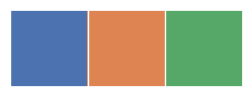

In [13]:
sns.set_theme(style='darkgrid')
sns.palplot(sns.color_palette("deep", 3))

<AxesSubplot: xlabel='year', ylabel='Count'>

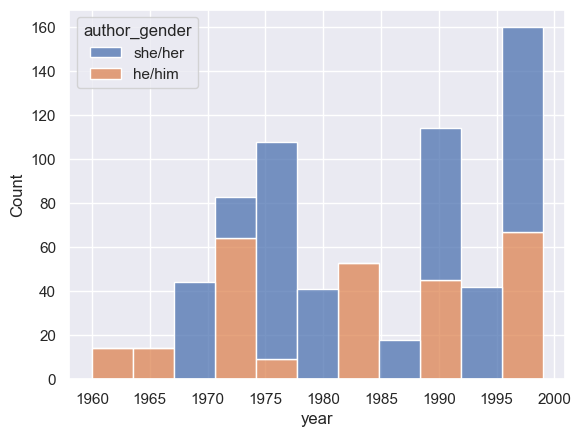

In [25]:
# auth_df = pickle_df.groupby('filename')['author_gender'].nunique()
# auth_df

sns.histplot(pickle_df, x="year", hue="author_gender", multiple="stack", stat="count")

# note one book written by a trans author (identifies as she/her -- written in 1993)

## Plot Gender Inferences for Main Characters
plots of gender proportions across all books and gender counts. also a plot of author gender vs character gender (maybe)

In [15]:
#create dataframes that segment by author gender
women_auth_df = pickle_df[pickle_df['author_gender'] == 'she/her']
men_auth_df = pickle_df[pickle_df['author_gender'] == 'he/him']
trans_auth_df = pickle_df[pickle_df['trans'] == 'yes']

#notes: these colors need to be consistent throughout. also need to add titles and explanations

<AxesSubplot: xlabel='year', ylabel='Proportion'>

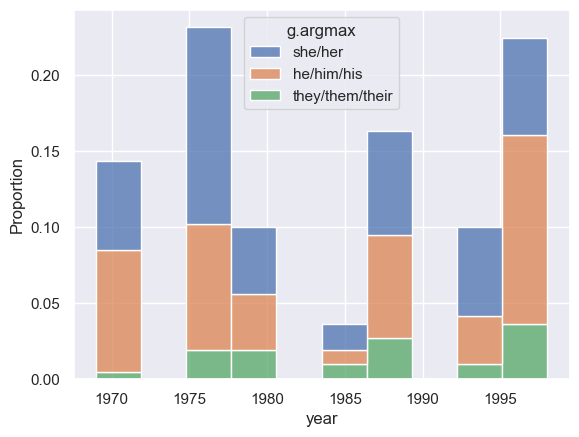

In [16]:
# characters by women 

sns.histplot(women_auth_df, x="year", hue="g.argmax", multiple="stack", stat="proportion")

<AxesSubplot: xlabel='year', ylabel='Proportion'>

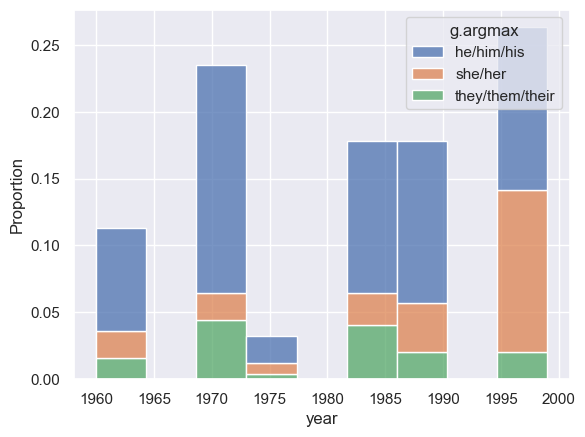

In [17]:
# characters by men

sns.histplot(men_auth_df, x="year", hue="g.argmax", multiple="stack", stat="proportion")

<AxesSubplot: xlabel='year', ylabel='Proportion'>

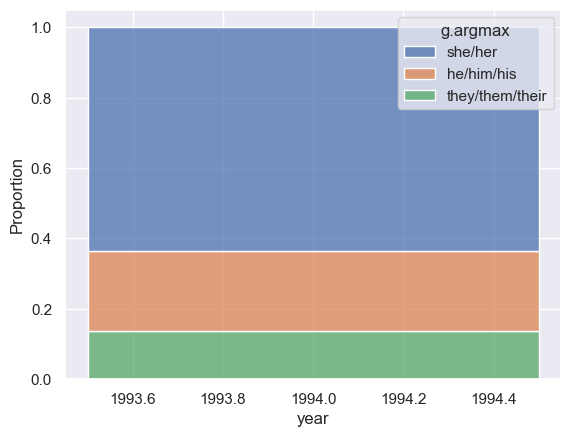

In [18]:
# characters by trans

sns.histplot(trans_auth_df, x="year", hue="g.argmax", multiple="stack", stat="proportion")

As part of our analysis, we created a dataset that recorded the gender of forty-two characters across twenty novels. While we tried to focus on non-binary or gender-fluid characters, we also included in our dataset the main characters of the novels. We do this to begin to test the accuracy of BookNLP's gender inference probability.

## Case studies
### Left Hand of Darkness
genderless aliens. Argaven has 2 she 1 he. Estraven has 1 he 1 she.

### Woman on the Edge of Time
Some of the characters use per/person as pronouns and are non-gendered. How are these characters showing up?

### Wild Seed (maybe)
Two god-like beings who can inhabit any body (and thus be any gender). Feminine character Anyanwu and masculine character Doro, names *should* be consistent throughout but pronouns may not be (?)


## Conclusion and Discussion

We will want to discuss limitations of project, data, and next steps. we will want to mention that we only have 24 books and this only on 20th c fiction -- hence booknlp performed in such a way bc of limited sample size. will also want to mention potential issues with booknlp.